## About The Data

> “These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines.”
0. Class (output)
1. Alcohol
2. Malic acid
3. Ash
4. Alcalinity of ash  
5. Magnesium
6. Total phenols
7. Flavanoids
8. Nonflavanoid phenols
9. Proanthocyanins
10. Color intensity
11. Hue
12. OD280/OD315 of diluted wines
13. Proline 


### Importing Files


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from pandas import set_option
from pandas import read_csv
from numpy import set_printoptions
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from skew_autotransform import skew_autotransform

#### Read file into dataframe

In [14]:
data = pd.read_csv('wine.csv')
column_names = ['Class', 'Alcohol', 'Malic acid', 'Ash', 'AlOfAsh', 'Magnesium', 'TotPhen', 'Flav', 
                'Nonflav', 'Proanthocyanins', 'Color Intensity', 'Hue', 'OD280-OD315', 'Proline']

input_names = ['Alcohol', 'Malic acid', 'Ash', 'AlOfAsh', 'Magnesium', 'TotPhen', 'Flav', 
                'Nonflav', 'Proanthocyanins', 'Color Intensity', 'Hue', 'OD280-OD315', 'Proline']

####  Add column names to data frame

In [15]:
data.columns = column_names

#### Initial Cleaning: Remove the nulls and text data
Before droping nulls data shape: (177, 14)
Observation: No data was dropped after running the code below

In [16]:
data = data.dropna()

In [17]:
# ----- Separate the output from the inputs
array = data.values
X = array[:,1:14] #inputs
Y = array[:,0] # output
# ----- Descriptive statistics
descrip1 = data.describe() #before pre-processing


Observation: Magnesium and Proline columns are orders of magnitude higher than the rest of the 
inputs. These may need to be normalized

C:\Users\cherr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\cherr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 ------------------------------------------------------

 NO TRANSFORMATION APPLIED FOR 'Class' . Skewness = 0.10


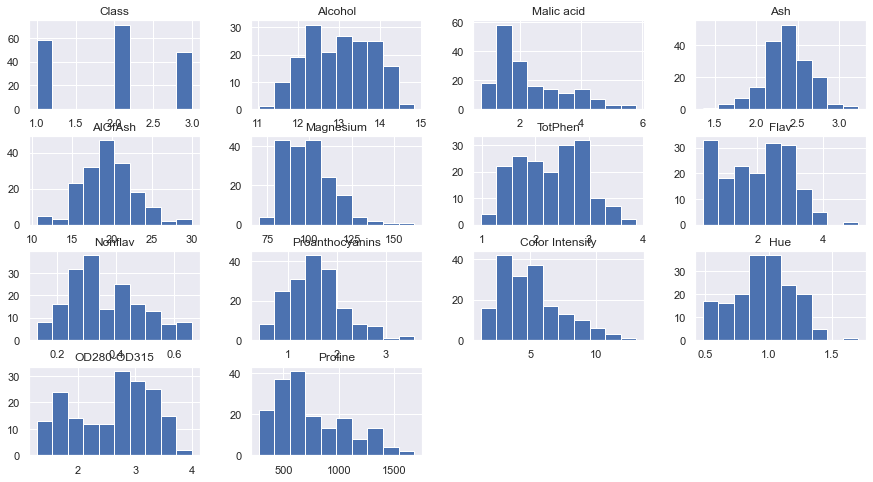

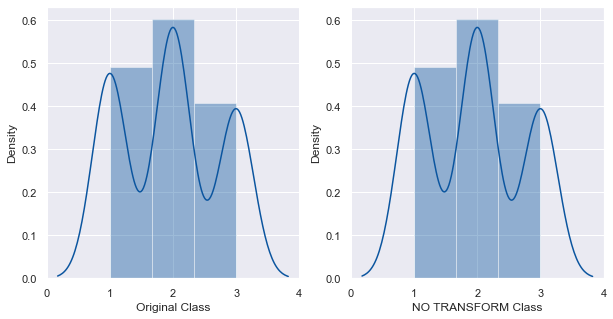

C:\Users\cherr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\cherr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 ------------------------------------------------------

 NO TRANSFORMATION APPLIED FOR 'Alcohol' . Skewness = -0.05


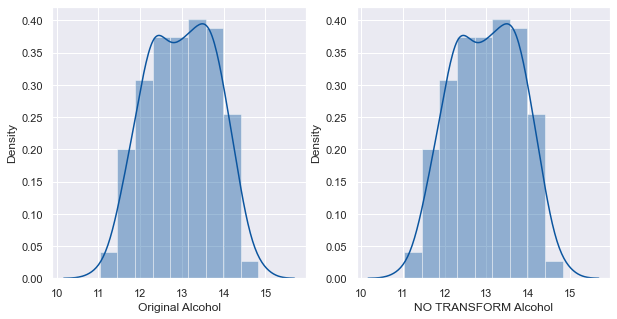

C:\Users\cherr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\cherr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 ------------------------------------------------------

 'Malic acid' had 'positive' skewness of 1.03

 Transformation yielded skewness of 0.03


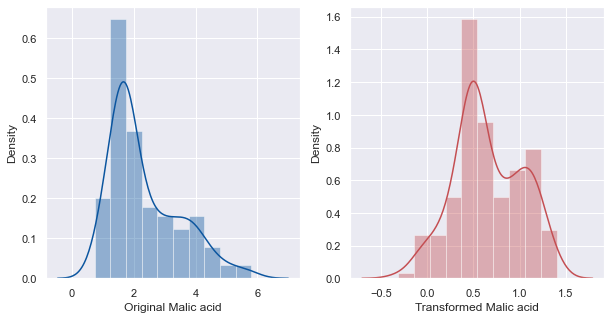

C:\Users\cherr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\cherr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 ------------------------------------------------------

 NO TRANSFORMATION APPLIED FOR 'Ash' . Skewness = -0.17


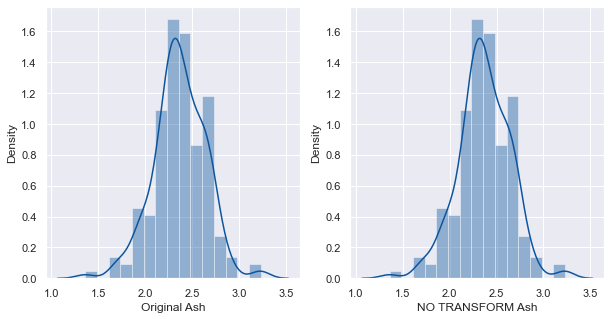

C:\Users\cherr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\cherr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 ------------------------------------------------------

 NO TRANSFORMATION APPLIED FOR 'AlOfAsh' . Skewness = 0.20


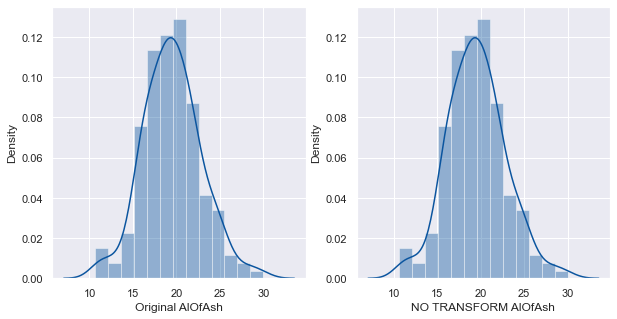

C:\Users\cherr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\cherr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 ------------------------------------------------------

 'Magnesium' had 'positive' skewness of 1.12

 Transformation yielded skewness of 0.00


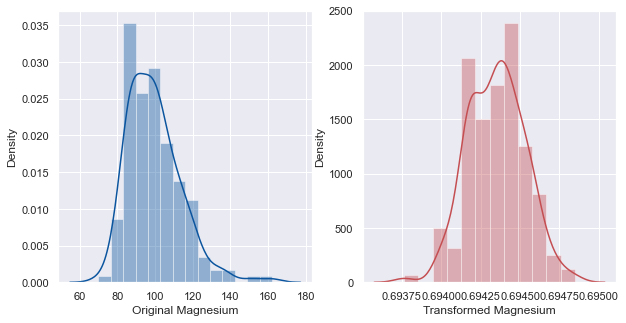

C:\Users\cherr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\cherr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 ------------------------------------------------------

 NO TRANSFORMATION APPLIED FOR 'TotPhen' . Skewness = 0.10


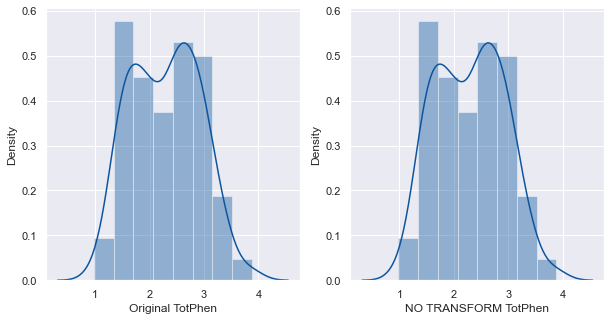

C:\Users\cherr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\cherr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 ------------------------------------------------------

 NO TRANSFORMATION APPLIED FOR 'Flav' . Skewness = 0.04


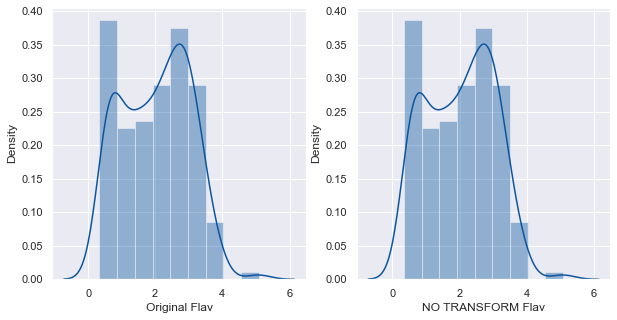

C:\Users\cherr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\cherr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 ------------------------------------------------------

 NO TRANSFORMATION APPLIED FOR 'Nonflav' . Skewness = 0.44


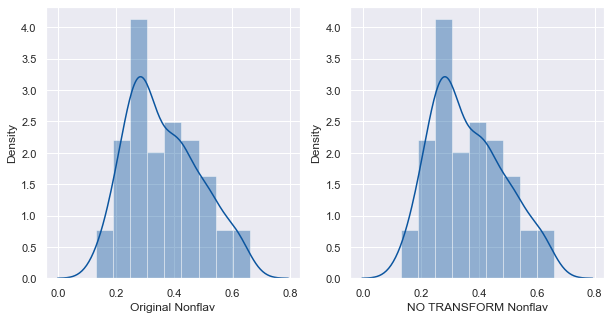


 ------------------------------------------------------

 NO TRANSFORMATION APPLIED FOR 'Proanthocyanins' . Skewness = 0.53


C:\Users\cherr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\cherr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


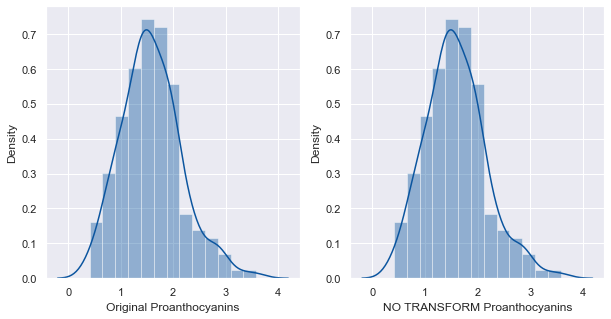

C:\Users\cherr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\cherr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 ------------------------------------------------------

 NO TRANSFORMATION APPLIED FOR 'Color Intensity' . Skewness = 0.87


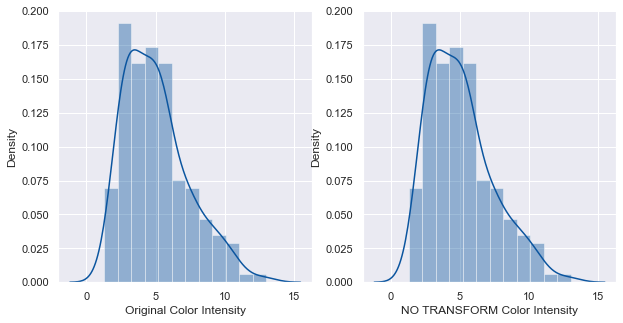

C:\Users\cherr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\cherr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 ------------------------------------------------------

 NO TRANSFORMATION APPLIED FOR 'Hue' . Skewness = 0.03


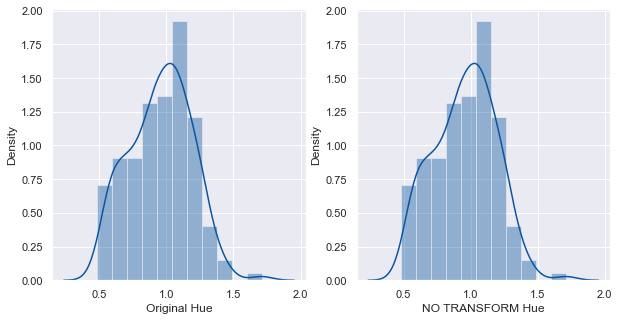


 ------------------------------------------------------

 NO TRANSFORMATION APPLIED FOR 'OD280-OD315' . Skewness = -0.32


C:\Users\cherr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\cherr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


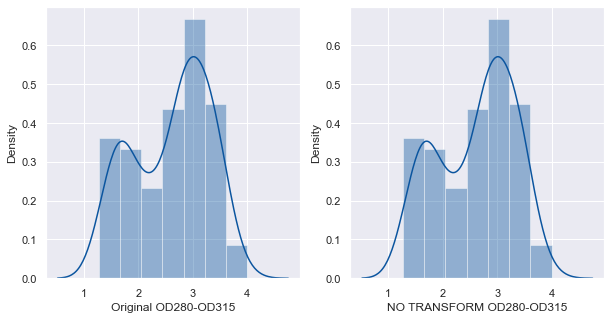

C:\Users\cherr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\cherr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 ------------------------------------------------------

 NO TRANSFORMATION APPLIED FOR 'Proline' . Skewness = 0.78


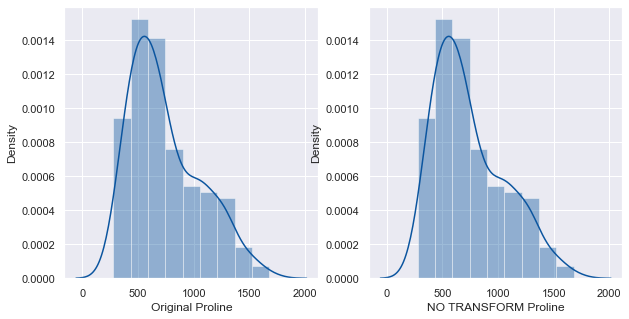

In [18]:
# ----- Plot the histograms for all columns
data.hist()
skewness = data.skew()
kurtosis = data.kurt()

data1 = data # First save cleaned data

# tool to test/transform/plot skewed data
data_skew_transform = skew_autotransform(data, include = None, exclude = None, 
                                         plot = True, threshold = 1, exp = False)



Observation: Based on the histograph, skewness, and kurtosis value, Malic Acid & Magnesium 
are both positively skewed and might benefit from log transformation

C:\Users\cherr\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


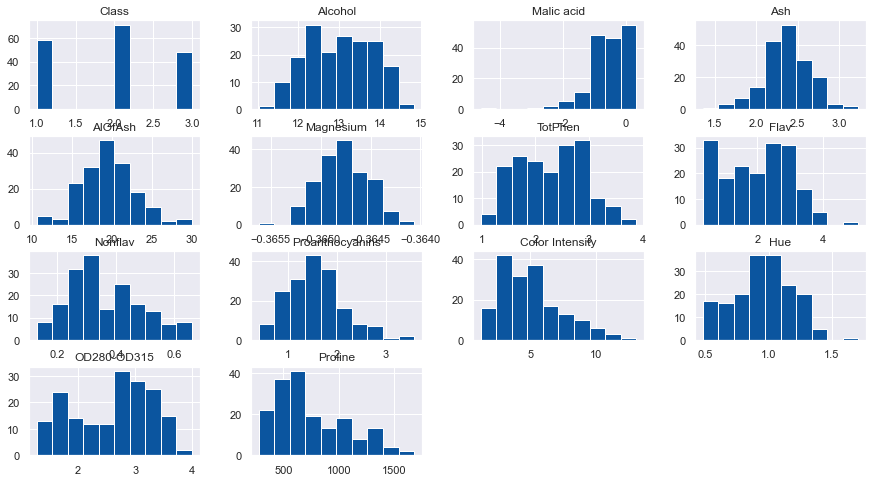

In [19]:
# --- Log transformation chosen for the columns below. Substituting log 
# transformed data into original columns
data['Malic acid'] = np.log(data['Malic acid'])
data['Magnesium'] = np.log(data['Magnesium'])

descrip2 = data.describe()
data.hist()

array = data.values
X1 = array[:,1:14] #inputs after log transformation
Y1 = array[:,0] # output after log transformation


Observation: The log transformation helped with the histograms of both columns above

### Normalization of Data

[[1.251e-02 1.687e-03 2.029e-03 1.062e-02 9.479e-02 2.512e-03 2.616e-03
  2.465e-04 1.213e-03 4.152e-03 9.953e-04 3.223e-03 9.953e-01]
 [1.106e-02 1.984e-03 2.245e-03 1.564e-02 8.491e-02 2.354e-03 2.724e-03
  2.522e-04 2.362e-03 4.775e-03 8.659e-04 2.665e-03 9.962e-01]
 [9.680e-03 1.314e-03 1.684e-03 1.132e-02 7.612e-02 2.593e-03 2.351e-03
  1.617e-04 1.468e-03 5.254e-03 5.793e-04 2.324e-03 9.970e-01]
 [1.777e-02 3.477e-03 3.853e-03 2.819e-02 1.584e-01 3.759e-03 3.611e-03
  5.236e-04 2.443e-03 5.800e-03 1.396e-03 3.934e-03 9.868e-01]
 [9.763e-03 1.210e-03 1.684e-03 1.045e-02 7.700e-02 2.248e-03 2.331e-03
  2.338e-04 1.354e-03 4.641e-03 7.219e-04 1.959e-03 9.969e-01]]
       Alcohol  Malic acid      Ash  AlOfAsh  Magnesium  TotPhen     Flav  Nonflav  \
count  1.8e+02     1.8e+02  1.8e+02  1.8e+02    1.8e+02  1.8e+02  1.8e+02  1.8e+02   
mean   2.0e-02     3.7e-03  3.7e-03  3.1e-02    1.5e-01  3.4e-03  3.0e-03  5.8e-04   
std    7.3e-03     2.5e-03  1.4e-03  1.5e-02    5.4e-02  1.5e-03  

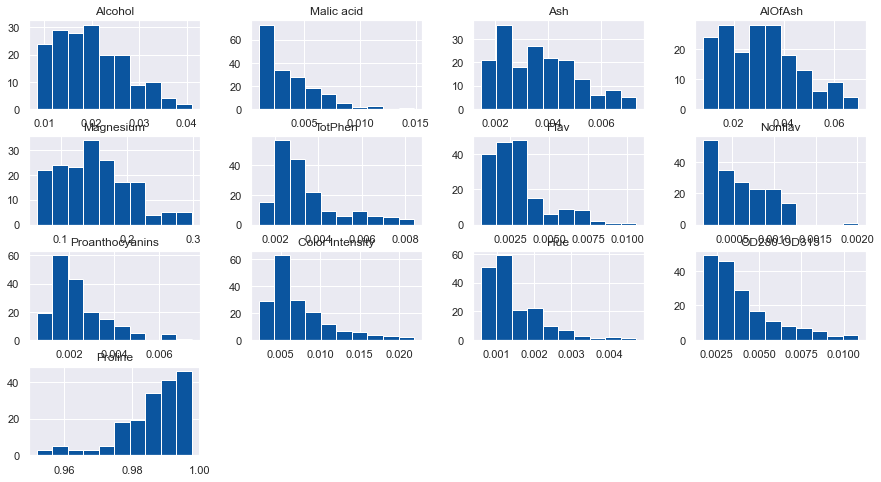

In [20]:
scaler = Normalizer().fit(X)
normalizedX = scaler.transform(X)
# summarize transformed data
set_printoptions(precision=3)
print(normalizedX[0:5,:])

# you can make a new data frame with the normalized data
dataNormDf = pd.DataFrame(normalizedX, columns = input_names)
#dataNormDf['Salary'] = Y 

# show descriptive stats after Normalization
set_option('display.width', 100)
set_option('precision', 1)
descriptionNorm = dataNormDf.describe()
print(descriptionNorm)

dataNormDf.hist()
plt.show()


### Standardization of Data

[[ 0.256 -0.502 -0.824 -2.5    0.029  0.573  0.74  -0.823 -0.539 -0.291
   0.407  1.132  0.971]
 [ 0.206  0.018  1.108 -0.276  0.1    0.813  1.222 -0.501  2.146  0.27
   0.32   0.805  1.401]
 [ 1.707 -0.349  0.488 -0.817  0.949  2.494  1.473 -0.984  1.041  1.184
  -0.424  1.203  2.341]
 [ 0.305  0.224  1.837  0.446  1.303  0.813  0.669  0.223  0.409 -0.317
   0.363  0.463 -0.032]
 [ 1.496 -0.52   0.306 -1.298  0.878  1.565  1.372 -0.18   0.672  0.731
   0.407  0.349  2.245]]
       Alcohol  Malic acid      Ash  AlOfAsh  Magnesium  TotPhen     Flav  Nonflav  \
count  1.8e+02     1.8e+02  1.8e+02  1.8e+02    1.8e+02  1.8e+02  1.8e+02  1.8e+02   
mean  -2.6e-16     4.3e-16 -4.4e-16 -6.4e-16   -1.0e-16 -1.3e-16  1.5e-16 -5.6e-16   
std    1.0e+00     1.0e+00  1.0e+00  1.0e+00    1.0e+00  1.0e+00  1.0e+00  1.0e+00   
min   -2.4e+00    -1.4e+00 -3.7e+00 -2.7e+00   -2.1e+00 -2.1e+00 -1.7e+00 -1.9e+00   
25%   -7.9e-01    -6.6e-01 -5.7e-01 -7.0e-01   -8.2e-01 -8.8e-01 -8.3e-01 -7.4e-01   
50% 

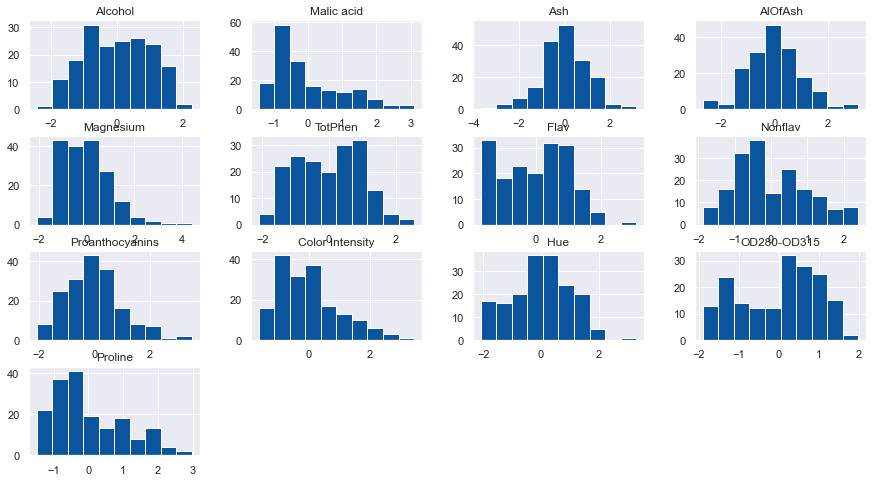

In [21]:
scaler = StandardScaler().fit(X)
rescaledX = scaler.transform(X)

# summarize transformed data
set_printoptions(precision=3)
print(rescaledX[0:5,:])

# you can make a new data frame with the standardized data
dataStandDf = pd.DataFrame(rescaledX, columns = input_names)
#dataStandDf['class'] = Y 

# show descriptive stats after standardization
set_option('display.width', 100)
set_option('precision', 1)
descriptionStand = dataStandDf.describe()
print(descriptionStand)

dataStandDf.hist()
plt.show()

Observation: After Normalization and Standardization based on their
histogram: There are no discernable difference on the shape of the 
histograms after standardization. 

### Correlation Analysis

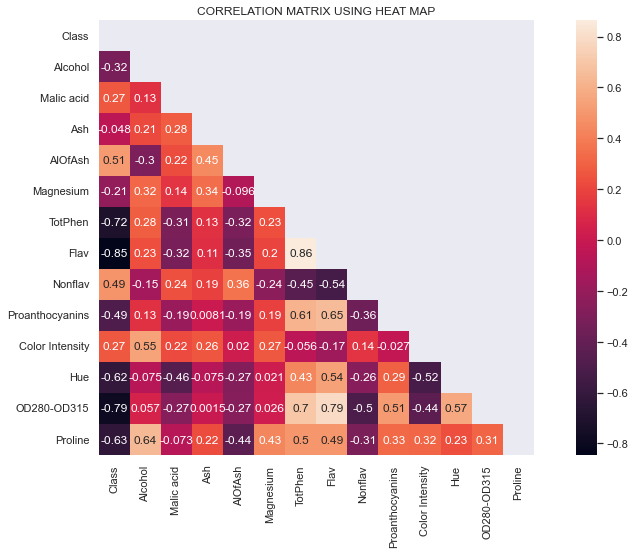

In [22]:
data_corr = data.corr(method="pearson")

data_corr1 = data_skew_transform.corr(method="pearson") # use the tool to confirm 


# Plot the correlation heatmap.  
mask = np.triu(np.ones_like(data_corr1, dtype=bool)) # mask the upper triangle
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(data_corr1, annot=True, square=True, mask = mask)
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.title("CORRELATION MATRIX USING HEAT MAP")
plt.show()


#### ------- Strong correlation (both positive and negative) x > 0.7 (+/-) :
With respect to the output(Class), these inputs have strong negative correlation: 
  'OD280-OD315', 'TotPhen', 'Flav'
With respect to each other, these inputs have strong correlation (+: strong positive, 
      - : strong negative):
   TotPhen & Flav (+)
   TotPhen & OD280-OD350 (+)
   Flav &  OD280-OD350 (+)
      
#### ------- Low to weak correlation(both positive and negative): between 0.3 & 0.5: 
 With respect to the output, these inputs have a weak correlation:
    'Color Intensity' (+), 'Magnesium' (-), 'Alcohol' (-), 'Malic Acid' (+) with 'Ash'
       having the lowest or no correlation to the output
 With respect to each other, unless mentioned on the Strong or Mild correlation, most
 inputs have weak or low correlation with each other with notables having corr numbers
 below 0.1 (+/-) which means they don't have correlation at all :
*   Alcohol & Hue
*   Malic Acid & Magnesium
*   Ash & Proanthocynanins
*   AlOfAsh & Color Intensity
*   AlOfAsh & Magnesium
*   Magnesium & OD280-OD350
*   TotPhen & Color Intensity
*   Proanthocynanins & Color Intensity 

#### ------- Moderately correlated between 0.5 & 0.7 :
With respect to the output(Class), these inputs are mildly correlated to it: 
   'Hue'(- corr), 'AlOfAsh(+ corr)'
 With respect to each other, these inputs have mild/moderate correlation:
*   Alcohol & Proline (+)
*   Alcohol & Color Intensity (+)
*   Malic Acid & Hue (-)
*   TotPhen & Proanthocyanins (+)
*   Flav & Hue (+)
*   Flav & Proanthocyanins (+)
*   Flav & NonFlav (-) 
*   NonFlav & OD280-OD350 (-)
*   Proanthocyanins & OD280-OD350 (+)
*   Color Intensity & Hue (-)
*   Hue & OD280-OD350 (+)   

### Scatter Plot

<Figure size 1080x576 with 0 Axes>

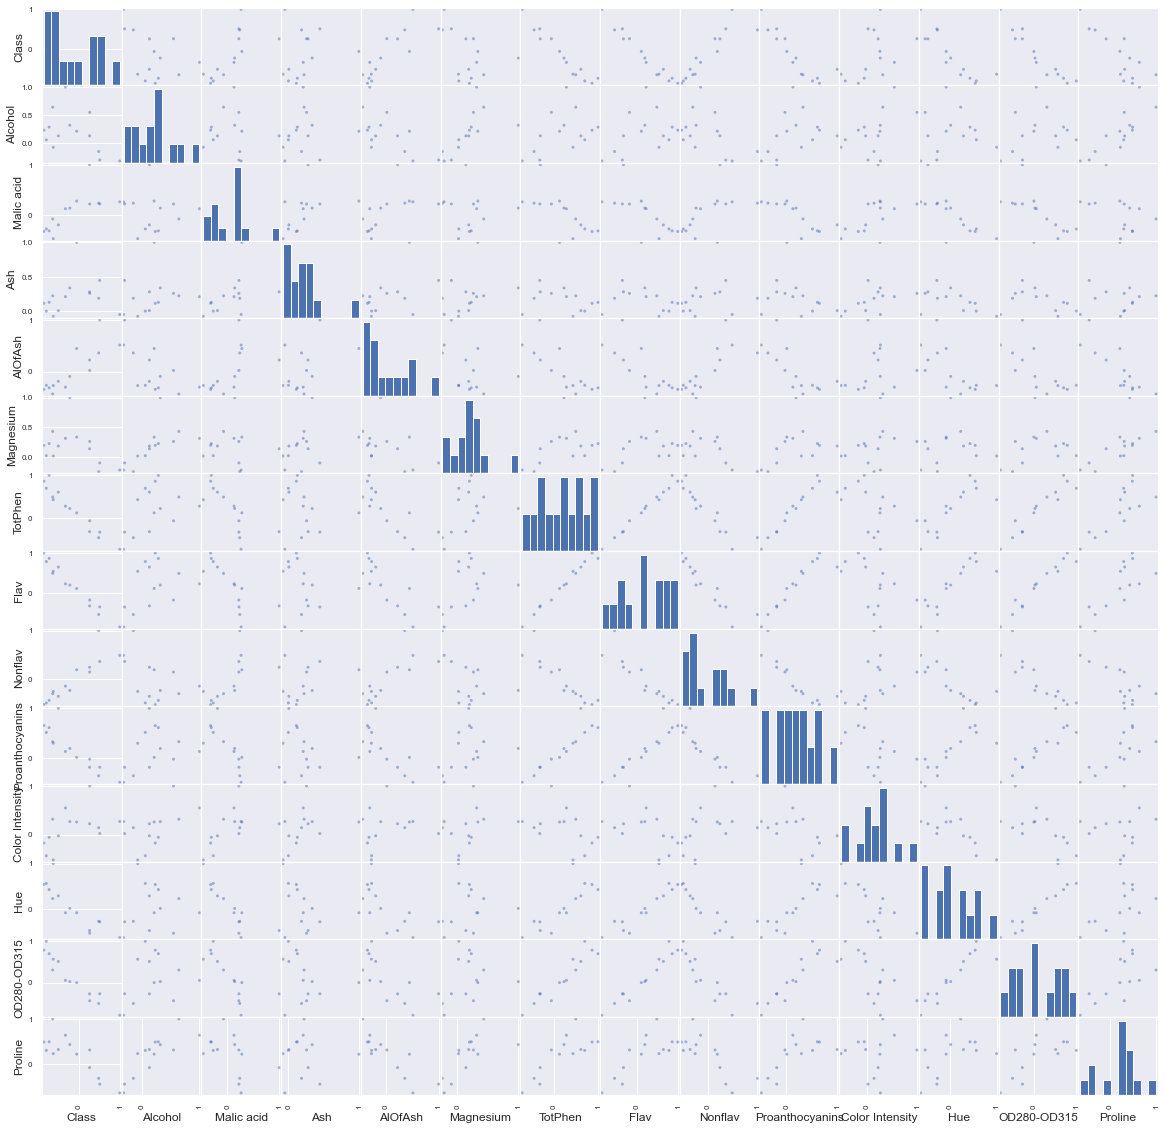

<Figure size 1080x576 with 0 Axes>

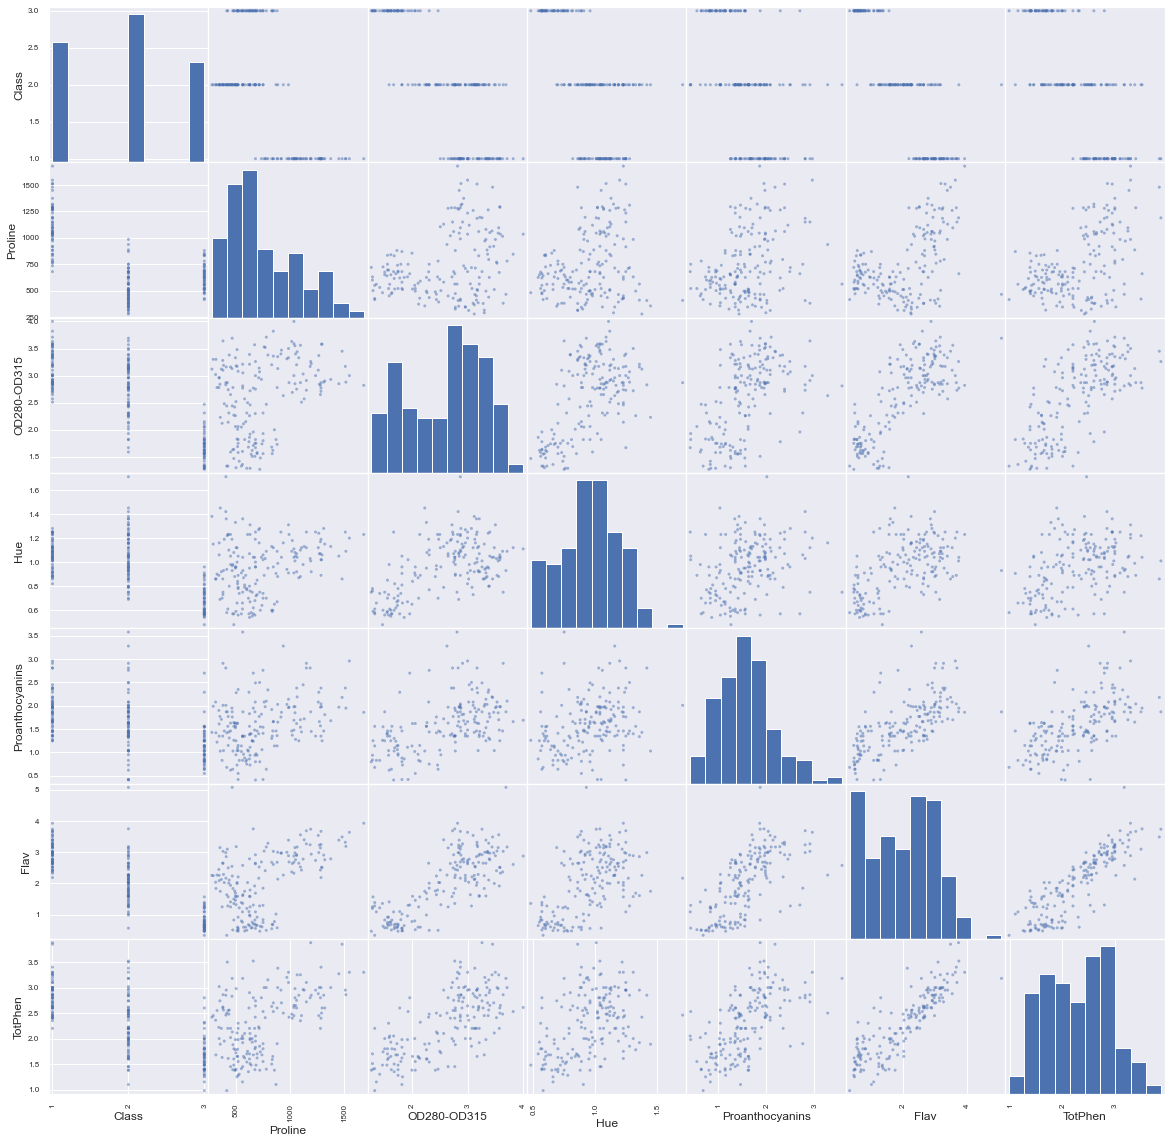

In [23]:
# ------ Plot Scatter (With all the columns)
plt.figure()
scatter_matrix(data_corr, figsize=(20,20))
plt.show()

# ------ Scatter Plot (With just the relevant columns)
plt.figure()
scatter_matrix(data.filter(items=['Class','Proline', 'OD280-OD315', 'Hue', 'Proanthocyanins', 'Flav', 'TotPhen']), figsize=(20,20))
plt.show()

### Determining the Linear or Non-linear relationship between columns

Observations: The scatter plots support the results of the heatmap and correlation coefficients. It further shows that the following have strong linear relationships with the output, Class (-: negative linear relationship, + positive linear relationship):
Class & OD250-OD350 (-), Class & Flav (-), Class & TotPhen(-)
The following inputs have moderate linear relationship with the output Class: Hue(-),   Proanthocyanins, & NonFlav (+)
The rest of the inputs have weak linear relationships with the output, Class.
As far as linear relationships between the inputs, there are very few standouts with one notable exception. TotPhen & Flav have near perfect positive linear relationship judging from the scatterplots and this relationship is further bolstered by a 0.86 correlation coefficient value. TotPhen & Flav are close to being multi-collinear. TotPhen also has a high positive linear relationship with OD280-OD350, which is supported by 0.7 corr coefficient. Flav & OD280-OD350 has a correlation coefficient of 0.79 but their linearity seems modest on the scatter plot.


### Summary 
The high negative correlation and linearity of the following chemical analysis: OD250-OD350 (this is an indication of the total protein content), Flavonoids (Flav), Total Phenols (TotPhen) suggests that the lower the content of these chemicals, the more they belong to Class 3 cultivar. Class 1 cultivars have higher content of the above chemicals. Total Phenols & Flavonoids are greatly affected by the Protein content or OD250-OD350 dilution of wines. The strong correlation coefficient and linearity of Total Phenols & Flavonoid content also suggest a multicollinearity. One might use one or the other for modeling but not both. 
As far as other aspects of the data, the data was very clean to begin with. We didn’t have to drop any null values. Hence, the remaining part of the data was representative of the total data. As far as its use for predictive modeling, the medium to strong negative correlation of some of the inputs vs the output indicate that it can be used for predictive modeling. Multicollinearity would be a problem because it would undermine the statistical significance of an independent variable. I don’t know enough if the near multicollinearity of Total Phenols and Flavonoids is significant to affect the output statistically. But generally, a lot of multicollinearities is a problem. To solve it, one should just use one of the variables for their model and not both. In our case, there aren’t a whole lot of strong variable correlations, so the continuous variables remain largely independent. A lot of the variables are also close to normal distributions already. So yes, a linear model would work for this data.
